## Lab09 - Frequent Patterns
#### Name 1 - Matt Turconi
#### Name 2 - Matt McLaughlin
#### Class - CSCI349 
#### Instructor - Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**1) [P] Add the import statements:**

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules

**These first exercises are going to allow you to leverage the actual documentation from the mlxtend user guide
online. Even though the first few of these are copied from their docs, it's good for you to have these examples in
one place. The second part of this lab will use a much more extensive transaction dataset.**

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

**2) [P] Go to the page: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ . Enter the list
dataset shown on the page. Then, copy the example code that transforms the list to a numpy encoded
array, then to a pandas DataFrame with the correct column names. Output your data frame.**

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


**3) [P] Show the result of describe() and info() on your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
Apple           5 non-null bool
Corn            5 non-null bool
Dill            5 non-null bool
Eggs            5 non-null bool
Ice cream       5 non-null bool
Kidney Beans    5 non-null bool
Milk            5 non-null bool
Nutmeg          5 non-null bool
Onion           5 non-null bool
Unicorn         5 non-null bool
Yogurt          5 non-null bool
dtypes: bool(11)
memory usage: 183.0 bytes


In [5]:
df.describe()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
count,5,5,5,5,5,5,5,5,5,5,5
unique,2,2,2,2,2,1,2,2,2,2,2
top,False,False,False,True,False,True,True,False,True,False,True
freq,4,3,4,4,4,5,3,3,3,4,3


**4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a
min_support of 0.6. Show the resulting dataframe, and store the result, since you'll have many selection
exercises next. All selection exercises must be done from this resulting frame. Set use_colnames=True.
It'll be much easier to interpret your patterns.**

In [6]:
df_freq = apriori(df, min_support=0.6, use_colnames=True)

**5) [P] Select all frequent itemsets that have support => 0.8**

In [7]:
df_freq[df_freq.support >= 0.8]

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
5,0.8,"(Eggs, Kidney Beans)"


**6) [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional
helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and
reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not
one of them! It's entirely up to you.)**

In [8]:
df_freq[df_freq.itemsets.apply(lambda x: len(x) >= 2)]

,support,itemsets
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


**7) [P] Select the frequent itemsets that contain an 'Onion' in the itemset.**

In [9]:
df_freq[df_freq.itemsets.apply(lambda x: 'Onion' in x)]

,support,itemsets
3,0.6,(Onion)
6,0.6,"(Eggs, Onion)"
8,0.6,"(Onion, Kidney Beans)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


**8) [P] Select the frequent itemsets that contain both 'Onion' and 'Eggs' in the itemset. (HINT: You should
have 2 frequent itemsets selected. And, if you haven't learned about the set type in Python and all of the
standard set operations, they can really make these types of questions much easier.)**

In [10]:
df_freq[df_freq.itemsets.apply(lambda x: ('Onion' in x and 'Eggs' in x))]

,support,itemsets
6,0.6,"(Eggs, Onion)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


**9) [P] Select the frequent itemsets that contain either an 'Onion' or 'Kidney Beans' (or both) in the
itemset. (HINT: You should have 8 frequent itemsets output.)**

In [11]:
df_freq[df_freq.itemsets.apply(lambda x: ('Onion' in x or 'Kidney Beans' in x))]

,support,itemsets
1,1.0,(Kidney Beans)
3,0.6,(Onion)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


**10) [P] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ contains the all the
information about the association rule interestingness metrics, as well as giving you the code to generate the
association rules. (NOTE – they mention a function called generate_rules(). The function is
association_rules().) Generate rules with a minimum confidence of 0.7. Store your resulting data
frame called rules. Show the entire data frame. (You should have 12 rules).**

In [12]:
df_rules = association_rules(df_freq, metric="confidence", min_threshold=0.7)
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


**11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".**

In [13]:
df_rules.sort_values(by=['lift', 'confidence'], ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
8,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


**12) [P] Select all rules that have a 1.0 support for the antecedent.**

In [14]:
df_rules[df_rules['antecedent support'] == 1.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0


**13) [P] Select all rules that have at least 3 or more items represented in the rule (i.e. the union of the antecedent
and consequent >= 3.)**

In [15]:
df_rules[df_rules.apply(lambda x: len(x.antecedents.union(x.consequents)) >= 3, axis=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
10,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
11,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


**14) [P] Select the rules that have confidence >= 0.75 and a lift > 1**

In [16]:
df_rules[df_rules.apply(lambda x: x.confidence >= 0.75 and x.lift > 1, axis=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
9,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
11,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


**15) [M] Clearly indicate this new section in your notebook:**
# Chipolte Data
**16) [P] Read in the Chipotle dataset:**

In [17]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

**17) [P] Show the result of df_chip.info(verbose=True) You should have five variables.**

In [18]:
df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


**18) [P] Show the result of describe(include='all')**

In [19]:
df_chip.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


**19) [P] Show the first 10 observations**

In [20]:
df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


**20) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be
transformed into usable types. Which ones, and what do you need to do with them?**
* It looks like item_name needs transformed to a string, choice_description needs converted to a set of some kind, and item_price needs to be a float.

**21) [P] Let's start doing some preprocessing. Convert the item_price field to a floating-point number.**

In [21]:
df_chip.item_price = pd.to_numeric(df_chip.item_price.replace('[\$,]', '', regex=True))

**22) [P] Convert the item_name to a categorical variable (HINT: Use pd.Categorical())**

In [22]:
df_chip.item_name = pd.Categorical(df_chip.item_name)

**23) [P] How many unique item_name values are there?**

In [23]:
len(df_chip['item_name'].cat.categories)

50

**24) [P] Show all of the unique values in item_name . Do you see any potential problems? (Leave them! Don't fix
them. Just pay close attention. Need a hint? Salsa)**
* 'Chips and Roasted Chili Corn Salsa' and 'Chips and Roasted Chili-Corn Salsa' are the same thing, so this is just wrong. This happens a few more times.

In [24]:
df_chip.item_name.cat.categories

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

**25) [P] How many distinct orders are there?**

In [25]:
df_chip.order_id.nunique()

1834

**26) [P] Show a boxplot of the number of line items per order. Do NOT consider the quantity of each item, just the
count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count
the number of lines per order.)**

Text(0, 0.5, 'num_unique')

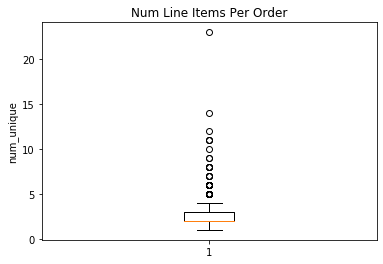

In [26]:
tmp = df_chip.order_id.value_counts()
ax = plt.boxplot(tmp)
plt.title("Num Line Items Per Order")
plt.ylabel("num_unique")

**27) [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each
item in each order. (The box plot will be similar to the previous, with the exception that there will be more
outliers, and the maximum outlier will be 35.)**

Text(0.5, 1.0, 'Total Items per Order')

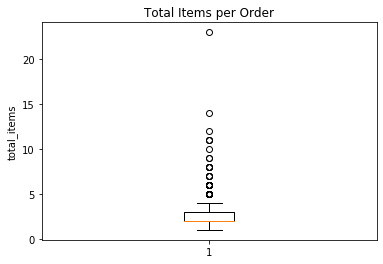

In [27]:
tmp = df_chip.groupby("order_id").count()
plt.boxplot(tmp.quantity)
plt.ylabel("total_items")
plt.title("Total Items per Order")

**28) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be
sure to consider the quantity of each item ordered!**

In [28]:
tmp = df_chip.groupby("item_name").sum()
tmp.sort_values(by='quantity', ascending=False)[['quantity']].head(5)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


**29) [P] What is the total number of "Steak Burrito" ordered?**

In [29]:
tmp.loc['Steak Burrito', 'quantity']

386

**30) [P] What is mean price for an order (NOTE – This is NOT just a mean of the item_price column!)**

In [30]:
df_chip.groupby('order_id').sum().mean().item_price

18.81142857142869

**31) [P] What was total revenue for the day?**

In [31]:
df_chip.groupby('order_id').sum().sum().item_price

34500.160000000214

**32) [P] What was the largest total price for a single order? Show the order number and the total price.**

In [32]:
tmp = df_chip.groupby('order_id').sum()
mx = tmp.item_price.max()
tmp[tmp.item_price == mx]

,quantity,item_price
order_id,,
926,23,205.25


**33) [P] Show the entire order to your answer to the previous question**

(NOTE: This should show you how some orders can contain multiple lines of the same item. Not uncommon!)

In [33]:
id = df_chip.groupby('order_id').sum().item_price.idxmax()
df_chip[df_chip.order_id == id]

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


**34) [P] What order had the largest total quantity of items purchased? Show the order number and the total
number of items**

In [34]:
tmp = df_chip.groupby('order_id').sum()
mx = tmp.quantity.max()
tmp[tmp.quantity == mx]

,quantity,item_price
order_id,,
1443,35,160.74


**35) [P] Show the entire order to your answer to the previous question**

In [35]:
id = tmp.quantity.idxmax()
df_chip[df_chip.order_id == id]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


## Frequent Patterns in Chipotle Data

**36) [P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as
part of an order_id. However, the data are not read in this way. You need to transform this dataset to a
collection of binary encoded transactions, where each row represents ONE transaction, and the columns are
binary encoded variables, with each variable representing ONE item available for purchase at Chipotle.
Convert your data. Your resulting data frame should have an index representing the order_id, and columns
representing each possible item from the item_name variable. For now, a transaction will ignore the
quantity of item purchased.**

The shape of your resulting data frame should be (1834,50)

In [36]:
item_lst = df_chip.groupby("order_id").apply(lambda x: list(x.item_name))
tmp = te.fit(item_lst).transform(item_lst)
df_chip_bin = pd.DataFrame(tmp, columns=te.columns_)

**37) [P] Show the first 10 observations from your transaction data**

In [37]:
df_chip_bin.head(10)

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**38) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the
apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?**
* We did not get any values returned from the apriori, so we probably need to pick a smaller values

In [38]:
df_chip_freq = apriori(df_chip_bin, min_support=.5)
df_chip_freq

,support,itemsets


**39) [P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive
into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in
order of most frequent to least. NOTE: That number essentially represents the absolute support for 1-
itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.)**

(HINT: The item with the highest support is 33.5%!)

In [39]:
tmp = df_chip_bin.sum()
df_item_count = pd.DataFrame({"item_count": tmp}, index=tmp.index).sort_values(by='item_count',ascending=False)
df_item_count['relative support'] = df_item_count.item_count / df_item_count.item_count.sum()
df_item_count.head(10)

,item_count,relative support
Chicken Bowl,615,0.143290
Chicken Burrito,489,0.113933
Chips and Guacamole,474,0.110438
Steak Burrito,342,0.079683
Canned Soft Drink,276,0.064306
Chips,208,0.048462
Steak Bowl,188,0.043802
Bottled Water,154,0.035881
Chips and Fresh Tomato Salsa,110,0.025629
Chicken Soft Tacos,107,0.024930


**40) [P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have
many variables, and most observations use only a handful of them. This is the definition of a sparse dataset.
You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many
frequent itemsets were reported? Report your frequent items sorted by decreasing support order.**

In [40]:
df_chip_freq = apriori(df_chip_bin, min_support=0.005, use_colnames=True)
df_chip_freq.shape

(146, 2)

In [41]:
df_chip_freq.sort_values(by='support', ascending=False)

,support,itemsets
11,0.335333,(Chicken Bowl)
12,0.266630,(Chicken Burrito)
18,0.258451,(Chips and Guacamole)
29,0.186478,(Steak Burrito)
7,0.150491,(Canned Soft Drink)
...,...,...
109,0.005453,"(Chicken Crispy Tacos, Chips and Guacamole)"
132,0.005453,"(Steak Soft Tacos, Steak Burrito)"
131,0.005453,"(Steak Bowl, Veggie Bowl)"
112,0.005453,"(Steak Bowl, Chicken Salad Bowl)"


**41) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and
conviction.**
* Lift: The ratio of observed support to that expect if x and y were independent
* Support: Indication of how frequently the items appear in the dataset
* Confidence: An indication of how often the rule has been found to be true
* Conviction: The ratio of the expected frequency that x occurs without y

**42) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?**

In [42]:
df_chip_rules = association_rules(df_chip_freq, metric='support', min_threshold=0.01)
df_chip_rules.shape

(108, 9)

**43) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your
strongest rule?**
* The strongest rule is bottled water and chips is most likely paired with a Chiken Bowl.

In [43]:
df_chip_rules[df_chip_rules.lift > 2].sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
90,"(Chips, Bottled Water)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337
92,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061
22,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467
97,"(Canned Soft Drink, Chicken Bowl)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883
91,"(Chips, Chicken Bowl)",(Bottled Water),0.066521,0.083969,0.015267,0.229508,2.733234,0.009681,1.188891
15,(Bottled Water),(Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347
94,(Bottled Water),"(Chips, Chicken Bowl)",0.083969,0.066521,0.015267,0.181818,2.733234,0.009681,1.140918
14,(Chips),(Bottled Water),0.113413,0.083969,0.019084,0.168269,2.003934,0.009561,1.101355
100,(Chips),"(Canned Soft Drink, Chicken Bowl)",0.113413,0.060523,0.019084,0.168269,2.780232,0.012220,1.129544
93,(Chips),"(Bottled Water, Chicken Bowl)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011000,1.112080


**44) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret
the following rule for the non data scientist. Be careful not to say, "if your customers purchase canned soft
drinks AND chips, they are also going to buy chicken bowls." Think! What do strong association rules convey?**
* Since the lift is greater than one, it gives us a pretty good indication that these events are dependent on eachother, so if someone buys botled water and chips, they are more likely to buy a chicken bowl. Confidence is also greater than 0.5 so we can say with realative certainty that this rule is accurate.

**45) [P] Suppose your boss is interested in what items are most likely related to a purchase of "Chips and
Guacamole". Using your rule set generated, first select the rules that have "Chips and Guacamole"
listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings.
Identify the item(s) that are the most suggestive of including "Chips and Guacamole" when purchased,
and state why.**
* Looking at both of these, we see that the first 4 rules don't change between the two. We think these 4 would be the most suggestive because they all have a lift > 1 and a conviction that isn't more than 1.25, so that would mean that they woul all be incorrect < 20% of the time.

In [44]:
df_guac_rules = df_chip_rules[df_chip_rules.consequents.apply(lambda x: 'Chips and Guacamole' in x)]

In [45]:
df_guac_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443
88,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682
86,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581
74,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943
82,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675
7,(Barbacoa Burrito),(Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731
46,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
64,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
32,(Canned Soft Drink),(Chips and Guacamole),0.150491,0.258451,0.033806,0.224638,0.869168,-0.005089,0.956390
85,(Steak Burrito),(Chips and Guacamole),0.186478,0.258451,0.041439,0.222222,0.859822,-0.006756,0.953420


In [46]:
df_guac_rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443
88,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682
86,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581
74,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943
106,(Chicken Bowl),"(Canned Soft Drink, Chips and Guacamole)",0.335333,0.033806,0.012541,0.037398,1.106268,0.001205,1.003732
82,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675
105,(Canned Soft Drink),"(Chicken Bowl, Chips and Guacamole)",0.150491,0.081243,0.012541,0.083333,1.025727,0.000315,1.002280
7,(Barbacoa Burrito),(Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731
46,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
64,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979


**46) [P] These data suggest that the "Chicken Bowl" is the single most frequent item purchased for this
particular location. Great. Let's dive into those chicken bowls more. As you know, Chipotle lets you customize
your items. That's what the choice_description field is for.**

Process all of the items listed in the "choice_description" field by creating a new transaction dataset
representing binary encoded transaction data for only Chicken Bowl. Note – this is tricky because the
choice_description variable is read in as a long string. The string itself represents a list, and quite often,
it's a list of lists. You need to process this to be an actual flattened list of items. Then, you can easily convert
these to transactions. This page will give you an idea on how to do it.
https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/ . However, keep in
mind that many of these lists contain lists themselves! You may need to just write a python function that takes
in a list of lists, and returns a single list of all of the items flattened out. Then, apply that function.

In [47]:
def flatten_list(string):
    string = str(string)
    sep_lst = string.split(',')
    for x in range(len(sep_lst)):
        sep_lst[x] = sep_lst[x].strip(" []")
    return sep_lst
df_chip.choice_description = df_chip.choice_description.apply(flatten_list)

0                                                   [nan]
1                                            [Clementine]
2                                                 [Apple]
3                                                   [nan]
4       [Tomatillo-Red Chili Salsa (Hot), Black Beans,...
                              ...                        
4617    [Fresh Tomato Salsa, Rice, Black Beans, Sour C...
4618    [Fresh Tomato Salsa, Rice, Sour Cream, Cheese,...
4619    [Fresh Tomato Salsa, Fajita Vegetables, Pinto ...
4620     [Fresh Tomato Salsa, Fajita Vegetables, Lettuce]
4621    [Fresh Tomato Salsa, Fajita Vegetables, Pinto ...
Name: choice_description, Length: 4622, dtype: object

In [48]:
df_chicken_bowls = df_chip[df_chip.item_name == "Chicken Bowl"].drop(['item_price', 'item_name', 'quantity'], axis=1).set_index('order_id')
tmp = te.fit(df_chicken_bowls.choice_description).transform(df_chicken_bowls.choice_description)
df_chicken_bowls_bin = pd.DataFrame(tmp, columns=te.columns_)
df_chicken_bowls_bin

,Black Beans,Cheese,Fajita Vegetables,Fajita Veggies,Fresh Tomato (Mild),Fresh Tomato Salsa,Fresh Tomato Salsa (Mild),Guacamole,Lettuce,Pinto Beans,Rice,Roasted Chili Corn Salsa,Roasted Chili Corn Salsa (Medium),Sour Cream,Tomatillo Green Chili Salsa,Tomatillo Red Chili Salsa,Tomatillo-Green Chili Salsa (Medium),Tomatillo-Red Chili Salsa (Hot),White Rice
0,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1,False,True,False,False,False,False,True,True,True,False,True,False,False,True,False,False,False,False,False
2,False,True,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False
3,True,True,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
4,False,True,False,True,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,True,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False
722,True,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False
723,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
724,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


**47) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the
choice_description items used with Chicken Bowls. Explain your findings.**
* Okay so looking at the results based on confidence really isn't that useful because all the highest confidence relations are based on rice. It seems fairly obvious to get rice if you're going to chipolte. We thing things get interesting when you look at the results based on lift. For the first 5 or so rules the confidence is above .4 which is still pretty dar great. The fact that Fajita Vegies shows up in the first 4 rules is pretty wild. It seems like a lot of people who are getting chickenbowls are also getting the vegies. 

In [49]:
df_chicken_bowl_freq = apriori(df_chicken_bowls_bin, min_support=0.1, use_colnames=True)
df_chicken_bowl_rules = association_rules(df_chicken_bowl_freq, metric='support', min_threshold=0.1)
df_chicken_bowl_rules.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
589,"(Fajita Vegetables, Guacamole, Cheese)",(Rice),0.107438,0.942149,0.107438,1.000000,1.061404,0.006215,inf
994,"(Sour Cream, Guacamole, Fresh Tomato Salsa, Ch...",(Rice),0.107438,0.942149,0.107438,1.000000,1.061404,0.006215,inf
1054,"(Lettuce, Guacamole, Sour Cream, Cheese)",(Rice),0.115702,0.942149,0.115702,1.000000,1.061404,0.006694,inf
575,"(Fajita Vegetables, Fresh Tomato Salsa, Cheese)",(Rice),0.110193,0.942149,0.110193,1.000000,1.061404,0.006375,inf
1024,"(Lettuce, Fresh Tomato Salsa, Sour Cream, Cheese)",(Rice),0.133609,0.942149,0.133609,1.000000,1.061404,0.007729,inf
744,"(Lettuce, Cheese, Sour Cream)",(Rice),0.325069,0.942149,0.323691,0.995763,1.056906,0.017428,13.652893
659,"(Lettuce, Fresh Tomato Salsa, Cheese)",(Rice),0.203857,0.942149,0.202479,0.993243,1.054232,0.010416,8.561983
964,"(Sour Cream, Lettuce, Black Beans, Cheese)",(Rice),0.185950,0.942149,0.184573,0.992593,1.053541,0.009380,7.809917
548,"(Guacamole, Black Beans, Sour Cream)",(Rice),0.129477,0.942149,0.128099,0.989362,1.050112,0.006113,5.438017
618,"(Fajita Vegetables, Cheese, Sour Cream)",(Rice),0.126722,0.942149,0.125344,0.989130,1.049867,0.005954,5.322314


In [50]:
df_chicken_bowl_rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
595,"(Guacamole, Rice)","(Fajita Vegetables, Cheese)",0.365014,0.185950,0.107438,0.294340,1.582893,0.039564,1.153600
594,"(Fajita Vegetables, Cheese)","(Guacamole, Rice)",0.185950,0.365014,0.107438,0.577778,1.582893,0.039564,1.503915
763,"(Lettuce, Fresh Tomato Salsa)","(Fajita Vegetables, Rice)",0.264463,0.274105,0.112948,0.427083,1.558103,0.040457,1.267017
762,"(Fajita Vegetables, Rice)","(Lettuce, Fresh Tomato Salsa)",0.274105,0.264463,0.112948,0.412060,1.558103,0.040457,1.251042
1014,"(Fresh Tomato Salsa, Sour Cream)","(Guacamole, Rice, Cheese)",0.245179,0.285124,0.107438,0.438202,1.536883,0.037532,1.272479
995,"(Guacamole, Rice, Cheese)","(Fresh Tomato Salsa, Sour Cream)",0.285124,0.245179,0.107438,0.376812,1.536883,0.037532,1.211224
766,(Fajita Vegetables),"(Lettuce, Fresh Tomato Salsa, Rice)",0.287879,0.256198,0.112948,0.392344,1.531409,0.039194,1.224052
759,"(Lettuce, Fresh Tomato Salsa, Rice)",(Fajita Vegetables),0.256198,0.287879,0.112948,0.440860,1.531409,0.039194,1.273601
277,"(Fajita Vegetables, Rice)",(Fresh Tomato Salsa),0.274105,0.446281,0.187328,0.683417,1.531361,0.065000,1.749049
280,(Fresh Tomato Salsa),"(Fajita Vegetables, Rice)",0.446281,0.274105,0.187328,0.419753,1.531361,0.065000,1.251011
